In [17]:
# reload external modules automatically if they are changed
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:

from genDSL_helpers import visualize_board, plot_arc_json
from dungeon_generation_script import generate_09c534e7
from more_generation_scripts import generate_27a28665, generate_007bbfb7


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import random
from tqdm import tqdm


################# PARAMETERS TO CHANGE ####################
dataset_folder = r'C:\Users\Acer\.arc\cache\dataset\testing_27a28665'
verbose = False
#generator_function = generate_09c534e7 # dungeon
#generator_function = generate_27a28665 # from more_generation_scripts.py
#generator_function = generate_007bbfb7 # from more_generation_scripts.py - fractal/recursive

generator_functions = [generate_09c534e7, generate_27a28665, generate_007bbfb7]

#total number of puzzles (meta samples)
dataset_size = 2

#number of training boards and testing boards
meta_trn_size_min = 2
meta_trn_size_max = 7
meta_tst_size     = 1

items_to_plot = 5

Generating dataset for generator function:  generate_09c534e7


Generating dataset:   0%|          | 0/2 [00:00<?, ?it/s]

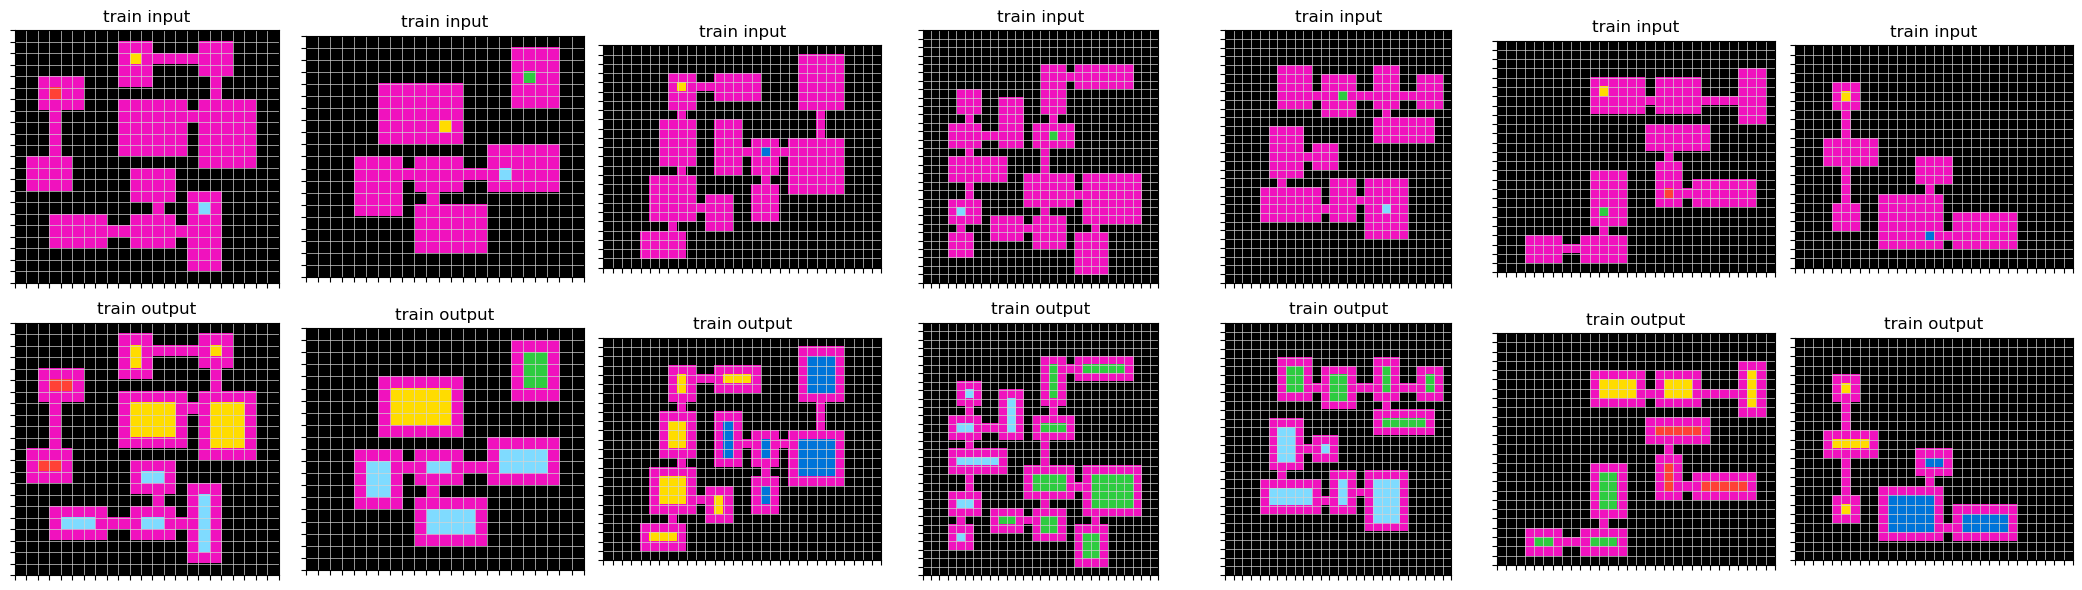

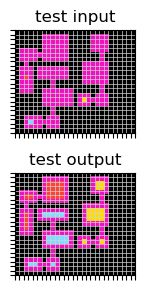

Generating dataset: 100%|██████████| 2/2 [00:03<00:00,  1.98s/it]

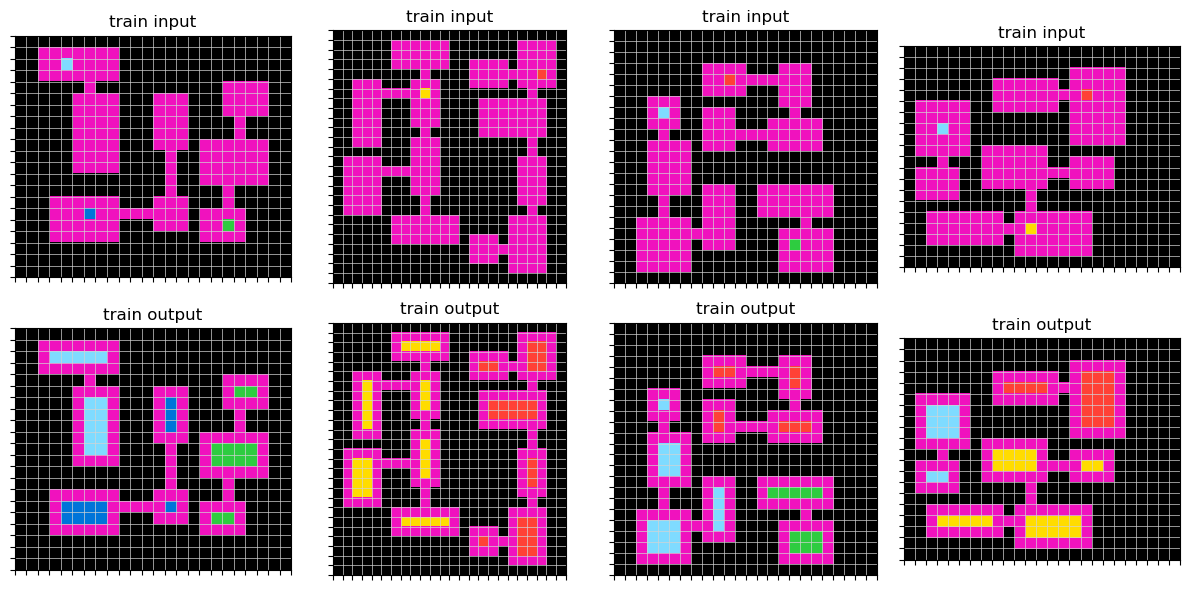

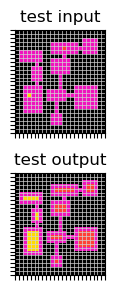

dataset generated
Generating dataset for generator function:  generate_27a28665


Generating dataset: 100%|██████████| 2/2 [00:06<00:00,  3.17s/it]


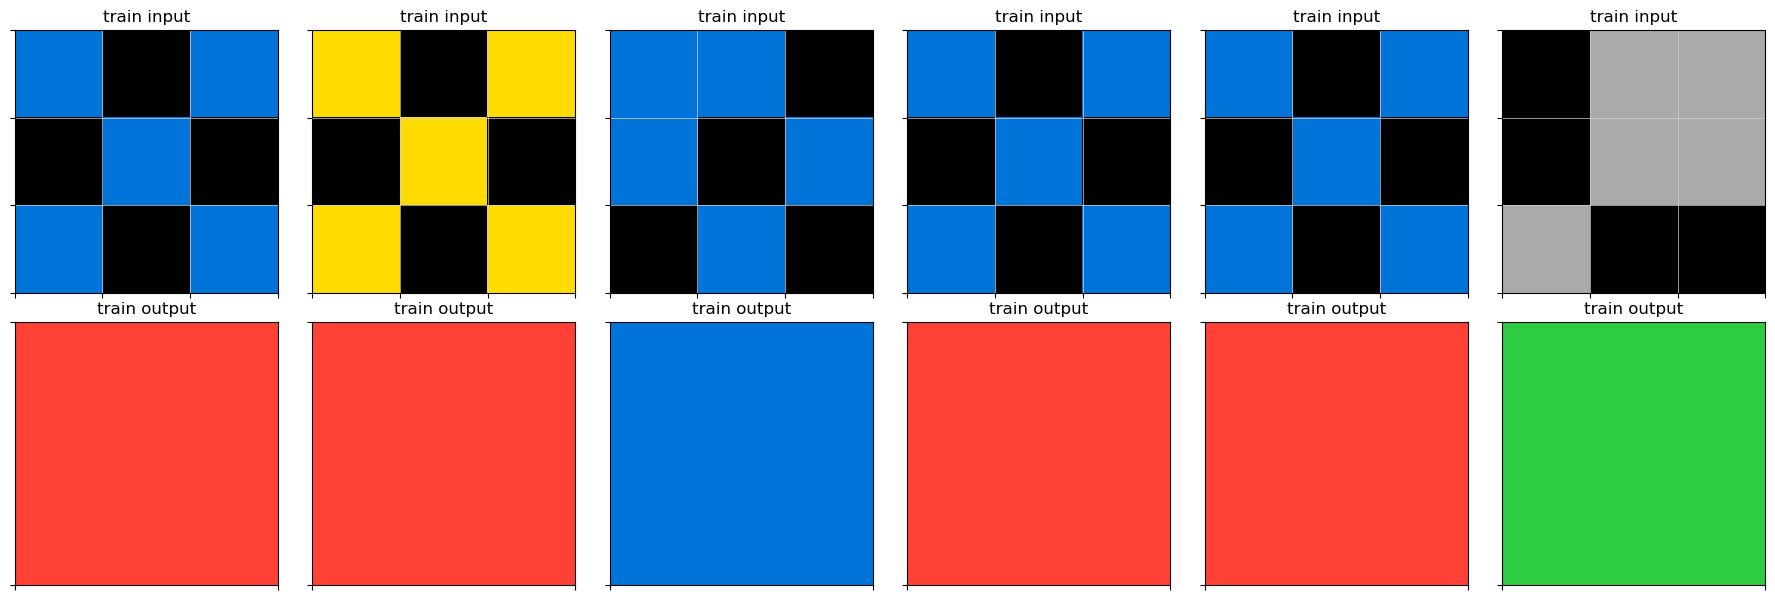

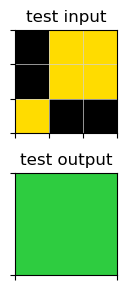

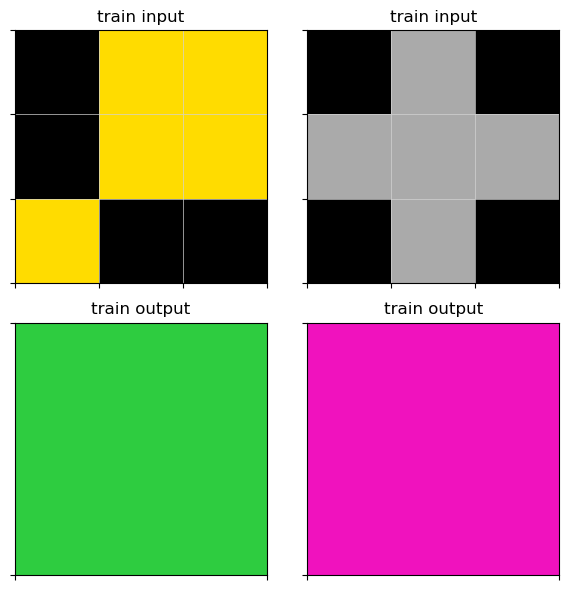

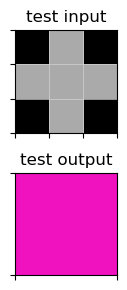

dataset generated
Generating dataset for generator function:  generate_007bbfb7


Generating dataset: 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]


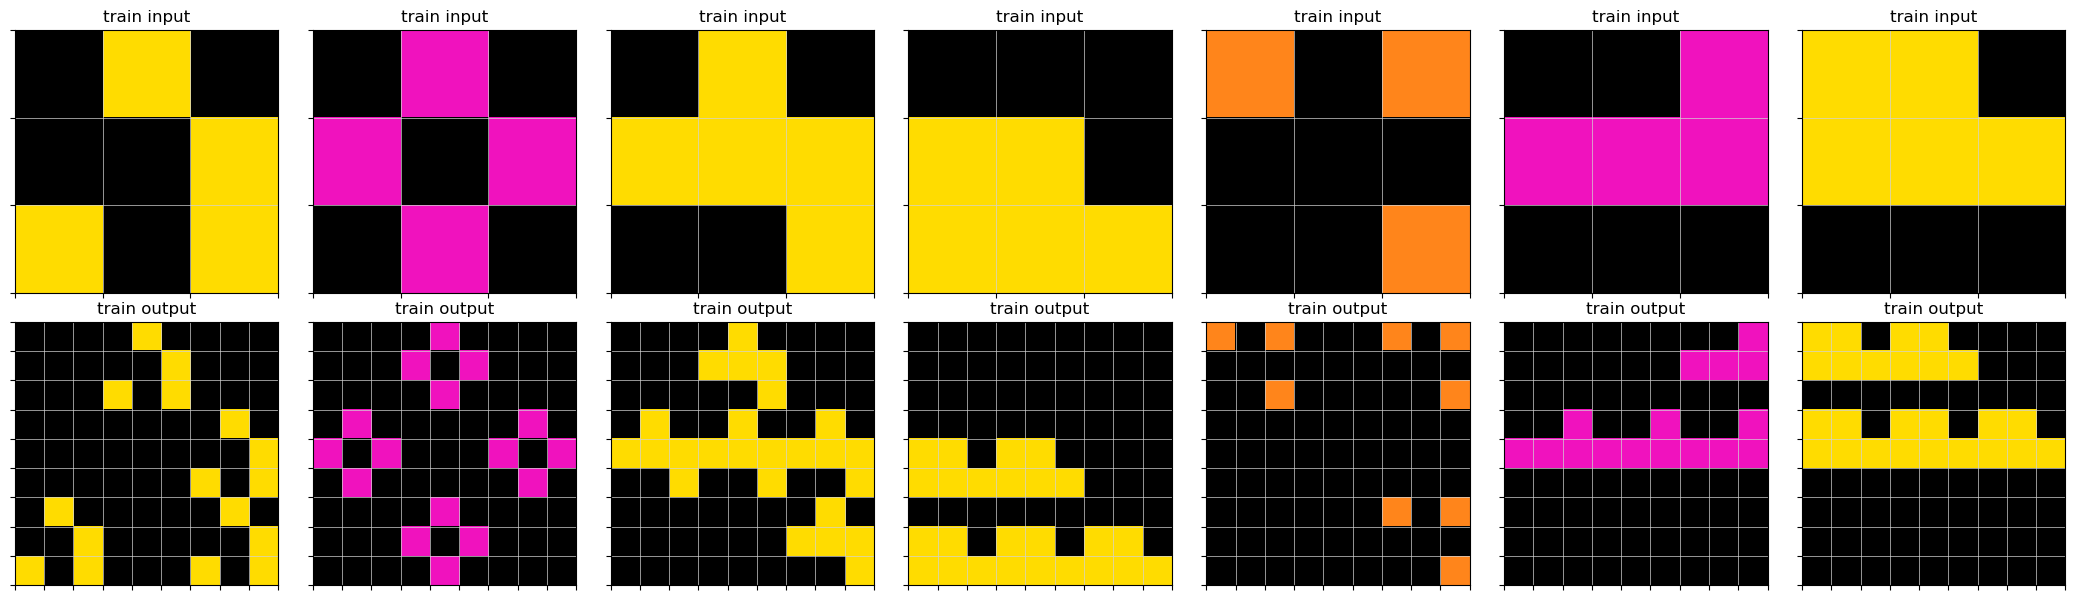

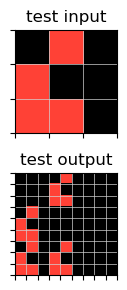

Generating dataset: 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

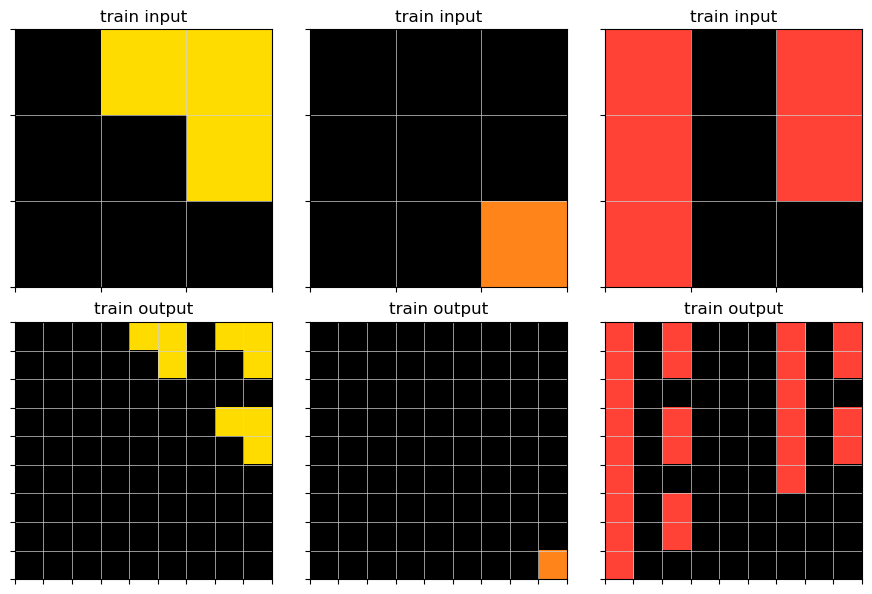

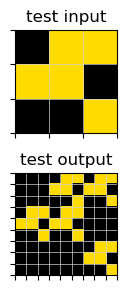

dataset generated


In [20]:
#adapted from Parapraxis dataset generation code

def gen_item_and_plot(plot = True):
    inp_board,out_board = generator_function()
    if plot:
        visualize_board(inp_board)
        visualize_board(out_board)
    return inp_board,out_board

def gen_train_items_and_plot(meta_trn_size = 1, plot = True):
    inp_out_pairs = []
    for i in range(meta_trn_size):
        inp_out_pairs.append(gen_item_and_plot(plot))
    return inp_out_pairs

for generator_function in generator_functions:
    print('Generating dataset for generator function: ', generator_function.__name__)
    pbar = tqdm(total=dataset_size, desc='Generating dataset')
    plot_count = 0
    for n in range(dataset_size):
        pbar.update(1)
        if verbose:
            print("PUZZLE #"+str(n+1))
        train_pairs=gen_train_items_and_plot(np.random.randint(meta_trn_size_min,meta_trn_size_max+1), False)
        test_pairs=gen_train_items_and_plot(meta_tst_size, False)
        
        json_obj = {}
        json_obj['train'] = []
        json_obj['test'] = []
        # train
        for i in range(len(train_pairs)):
            a = {
                'input': train_pairs[i][0].tolist(),
                'output': train_pairs[i][1].tolist()
            }
            json_obj['train'].append(a)

        a = {'input': test_pairs[0][0].tolist(),
            'output': test_pairs[0][1].tolist()    }
        json_obj['test'].append(a)

        if plot_count < items_to_plot:
            plot_arc_json(json.dumps(json_obj))
            plot_count += 1

        # verify folder exists ./dungeon_dataset/
        if not os.path.exists(dataset_folder):
            os.makedirs(dataset_folder)
        #make a new filename that is 8 characters long and represents a random hex number
        # characters betwee 0-9 and a-f
        string = '0123456789abcdef'
        filename = ''.join(random.choice(string) for i in range(8)) + '.json'
        # write the json object to a file
        with open(os.path.join(dataset_folder, filename), 'w') as outfile:
            json.dump(json_obj, outfile)
        

        
        if verbose:
            print()
            print()

    print('dataset generated')